1.7182819716491953
1.7182818284590455
1.718281828459045


C:\Users\Noah Huffman\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Noah Huffman\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


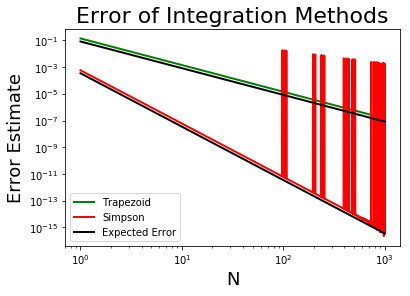

(1.7182818284590538, 512, 4.781317154237679e-15)
(1.718281828459045, 1.9076760487502454e-14)
1.7182818284590782


In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import mpmath
import scipy.integrate as integrate

# defining the Trapezoid Numerical Intgration Function
def nIntegrate_Trap(func,a,b,N):
    hn = (b-a)/N
    x = np.linspace(a,b,N+1)
    ret = hn*((func(x[0])+func(x[x.size-1]))/2+np.sum(func(x[1:(x.size-1)])))
    return ret

# defining the Simpson Numerical Intgration Function
def nIntegrate_Simpson(func,a,b,N):
    hn = (b-a)/N
    x = np.linspace(a,b,N+1)
    c = np.arange((a+hn)/2,b+hn/2,hn)
    ret = hn*((func(x[0])+func(x[x.size-1]))/6+(1/3)*np.sum(func(x[1:(x.size-1)]))+(4/6)*np.sum(func(c)))
    return ret

# function to be integrated
def g(x):
    return np.e**(x)

# Wow Mom! Look how close we got!
print(nIntegrate_Trap(g,0,1,1000))
print(nIntegrate_Simpson(g,0,1,1000))
print(np.e-1)

# Plotting Error
answer = np.e-1
N = 1000
N_vec = np.linspace(1,N,N)
approx_t = np.zeros(N_vec.size)
approx_s = np.zeros(N_vec.size)

for i in range(N_vec.size):
    approx_t[i] = nIntegrate_Trap(g,0,1,N_vec[i])
    approx_s[i] = nIntegrate_Simpson(g,0,1,N_vec[i])

plt.figure()
plt.loglog(N_vec, (approx_t-answer), linewidth=2.0, color='green', label='Trapezoid')
plt.loglog(N_vec, (approx_s-answer), linewidth=2.0, color='red', label='Simpson')
plt.loglog(N_vec,1/(12*N_vec**(2)),linewidth=2.0, color='black', label='Trap_exact')
plt.loglog(N_vec,1/(2880*N_vec**(4)),linewidth=2.0, color='black', label='Simp_exact')
plt.xlabel('N', fontsize=18)
plt.ylabel('Error Estimate', fontsize=18)
plt.title('Error of Integration Methods', fontsize=22)
plt.legend(['Trapezoid','Simpson','Expected Error'], loc='best')
plt.savefig('Plot_'+repr(N)+'.png',bbox_inches='tight')
plt.show()

# Integrates to a specified relative accuracy
def nIntegrate_error(func,a,b,N0,value):
    error = 10000
    k = 0
    while error > value:
        k = k+1
        error = np.absolute((nIntegrate_Simpson(func,a,b,2**(k)*N0)-nIntegrate_Simpson(func,a,b,2**(k+1)*N0))/nIntegrate_Simpson(func,a,b,2**(k)*N0))
    return (nIntegrate_Simpson(func,a,b,2**(k)*N0),2**(k)*N0,error)

print(nIntegrate_error(g,0,1,1,1.9076760487502454e-14))

# Compairing our results to scipy's. Looks like we are pretty close.
print(integrate.quad(g,0,1))
print(integrate.romberg(g,0,1))